In [59]:
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline


dataPath = "../../../VIDIT/train/"
allLocations = ["scene_abandonned_city_54", "scene_artic_mountains_32", "scene_fantasy_castle_59", "scene_grave_43", 
                "scene_medieval_43", "scene_moutains_9", "scene_nordic_23", "scene_road_33", "scene_table_7"]
allDirections = ["NW", "N", "NE", "E", "SE", "S", "SW", "W"]
allColors = ["2500", "3500", "4500", "5500", "6500"]

In [107]:
def getScenesFromLocation(location):
    dataset = pd.read_csv(os.path.join(dataPath,location,"dataset.csv"))
    allScenes = dataset['scene'].drop_duplicates().tolist()
    return allScenes


def getFile(location, scene, color, direction):
    filePath = os.path.join(dataPath, location, color, direction)
    
    dataset = pd.read_csv(os.path.join(filePath, "dataset_" + color + "_" + direction + ".csv"))
    imageName = dataset[dataset['scene'] == scene]['rendered_image'].values[0] 
    img = mpimg.imread(os.path.join(filePath, imageName))[:,:,0:3]
    return img


In [108]:
def dataloader(location, scenes = None, input_directions = allDirections, input_colors = allColors,
               output_directions = allDirections, output_colors = allColors):
    
    all_scenes = getScenesFromLocation(location)
     
    
    in_imgs = []
    out_imgs = []
    for s in scenes:
        for d in input_directions:
            for c in input_colors:
                in_imgs.append(getFile(location, s, c, d))
    for s in scenes:
        for d in output_directions:
            for c in output_colors:
                out_imgs.append(getFile(location, s, c, d))
    
    return in_imgs,out_imgs

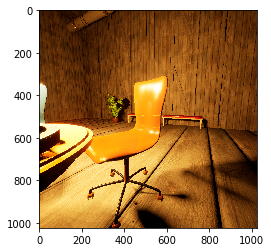

In [125]:
testreal = dataloader("scene_table_7", input_directions = ['W'], input_colors = ['2500'], 
                                output_directions = ['E'], output_colors = ['6500'])
plt.imshow(testreal[0][2])

In [98]:
test123

['SM_TableRound20191018195329',
 'SM_TableRound20191018195334',
 'Chair_32019101819543',
 'SM_WagonWheel012019101819549',
 'SM_WagonWheel0120191018195415',
 'SM_TableRound20191018195428',
 'SM_TableRound20191018195436']

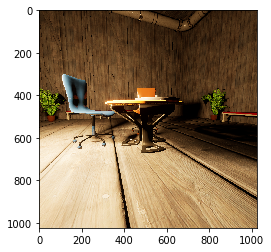

In [93]:
test123 = getScenesFromLocation("scene_table_7")
abc = getFile("scene_table_7", test123[5], 'W','3500')
plt.imshow(abc)